#Exercício Prático - Data Visualization

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [40]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.2
    Uninstalling Werkzeug-3.1.2:
      Successfully uninstalled Werkzeug-3.1.2


#Desafio Prático 1: Visualizando Dados Diferentes
Descrição: Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.

**Tarefas:**

1. Carregar os dados de um arquivo CSV fornecido (saude.csv).


In [2]:
df_saude = pd.read_csv('saude.csv')

In [4]:
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [8]:
df_saude.describe()

,id,age,height,weight
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,34.800000,167.800000,72.600000
std,3.02765,8.753412,7.857056,11.057426
min,1.00000,23.000000,155.000000,55.000000
25%,3.25000,28.250000,161.250000,65.750000
50%,5.50000,35.000000,169.000000,72.500000
75%,7.75000,39.500000,173.750000,79.500000
max,10.00000,50.000000,180.000000,90.000000


2. Criar um histograma da variável 'age' usando Matplotlib.


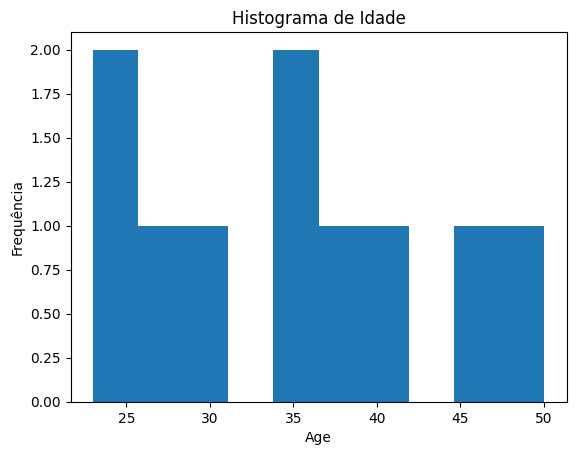

In [11]:
plt.hist(df_saude['age'])
plt.title('Histograma de Idade')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn

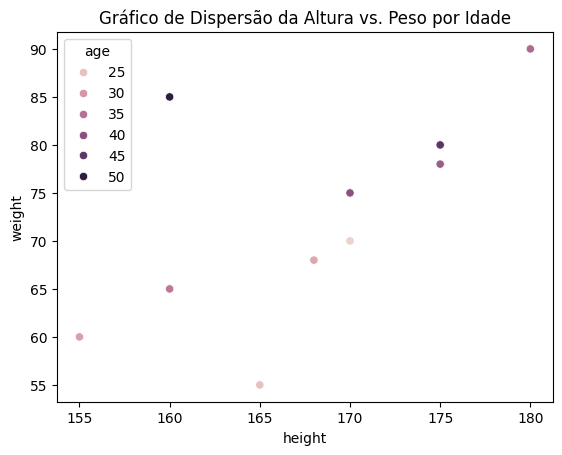

In [13]:
sns.scatterplot(data=df_saude, x='height', y='weight', hue='age')
plt.title('Gráfico de Dispersão da Altura vs. Peso por Idade')
plt.show()

4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por 'gender' usando Plotly.


In [34]:
gender_quant = df_saude['gender'].value_counts().reset_index()
gender_quant

,gender,count
0,M,5
1,F,5


In [86]:
fig = px.bar(gender_quant, x='gender', y='count', color='gender', barmode='group',
             title='Quantidade de Gênero')
fig.show()

#Desafio Prático 2: Séries Temporais
Descrição: Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar tendências e sazonalidades.

**Tarefas:**


1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).

In [43]:
df_vendas = pd.read_csv('vendas.csv')

In [44]:
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [45]:
df_vendas.describe()

,sales
count,31.000000
mean,258.387097
std,82.101432
min,100.000000
25%,200.000000
50%,250.000000
75%,325.000000
max,400.000000


2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib

In [50]:
df_vendas_plot = df_vendas.set_index('date')
df_vendas_plot

,sales
date,
2023-01-01,100
2023-01-02,150
2023-01-03,200
2023-01-04,130
2023-01-05,180
2023-01-06,220
2023-01-07,210
2023-01-08,190
2023-01-09,170


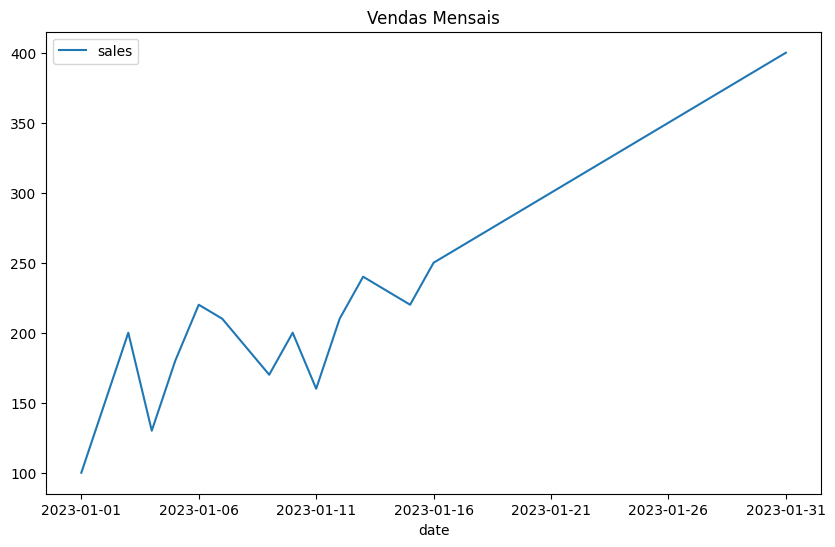

In [52]:
df_vendas_plot.plot(figsize=(10, 6))
plt.title('Vendas Mensais')
plt.show()

3. Criar um gráfico de decomposição sazonal usando Seaborn.


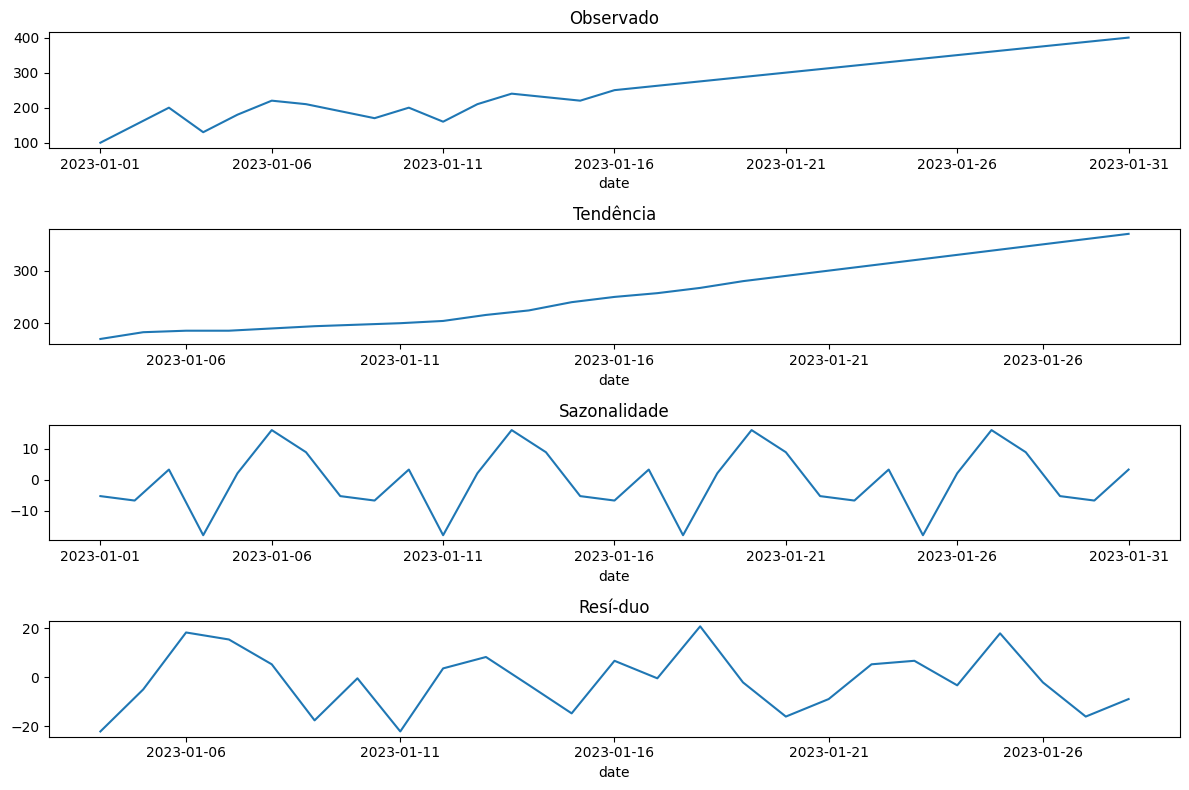

In [79]:
decomposition = seasonal_decompose(df_vendas_plot['sales'], model='additive', period=7) #sazonalidade semanal

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Resí­duo')

plt.tight_layout()
plt.show()

4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly.

In [83]:
fig = px.line(df_vendas, x='date', y='sales', title='Vendas ao Longo do Tempo')

fig.show()